In [1]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\acer\Downloads\Iris.csv')
print(df)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
df=df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

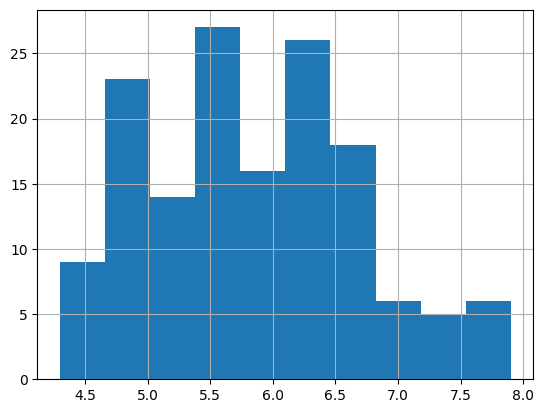

In [6]:
df['SepalLengthCm'].hist()

<Axes: >

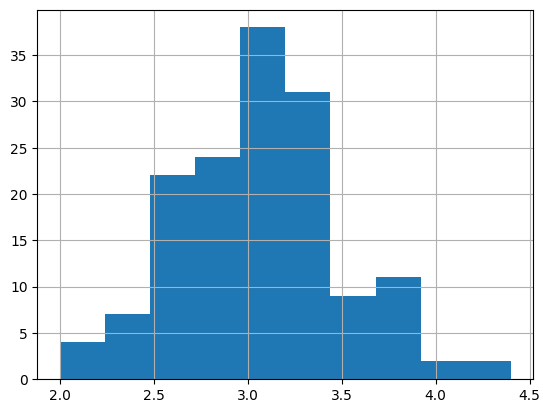

In [7]:
df['SepalWidthCm'].hist()

<Axes: >

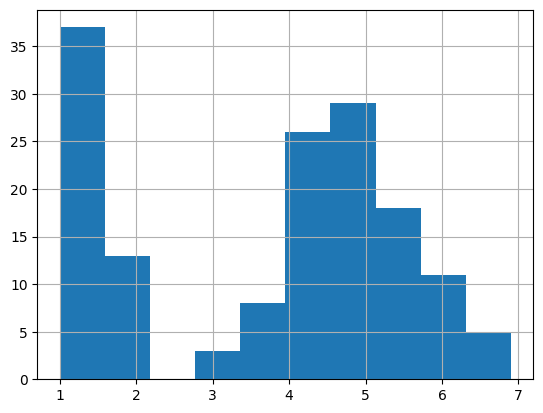

In [8]:
df['PetalLengthCm'].hist()

<Axes: >

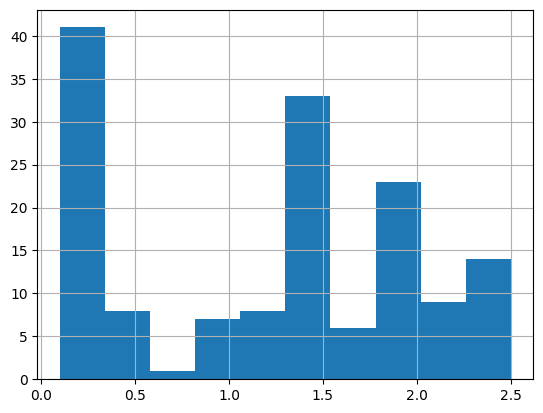

In [9]:
df['PetalWidthCm'].hist()

In [10]:
colors=['blue','green','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

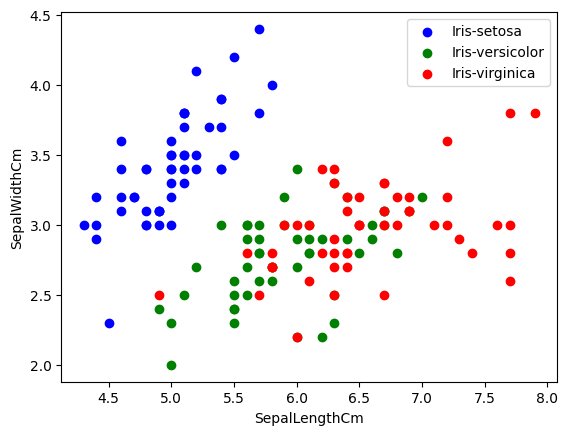

In [11]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

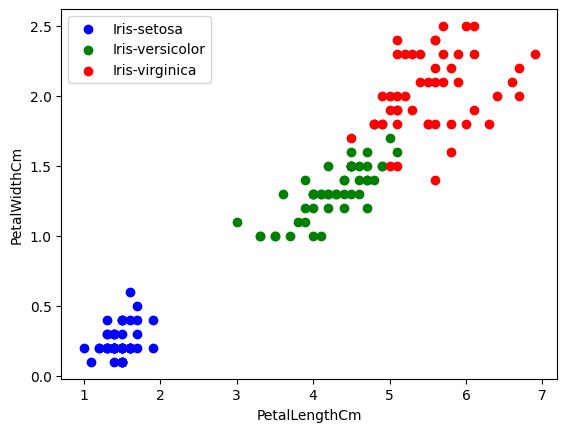

In [12]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

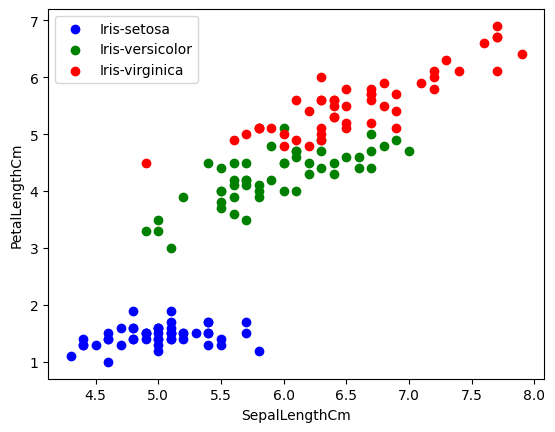

In [13]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.legend()

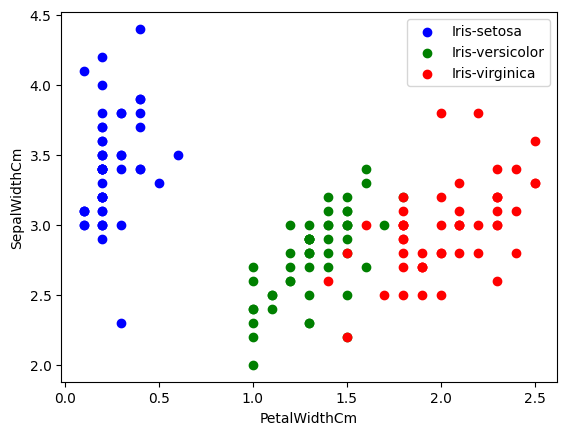

In [14]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['PetalWidthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

corr_m = numeric_df.corr()
print(corr_m)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<Axes: >

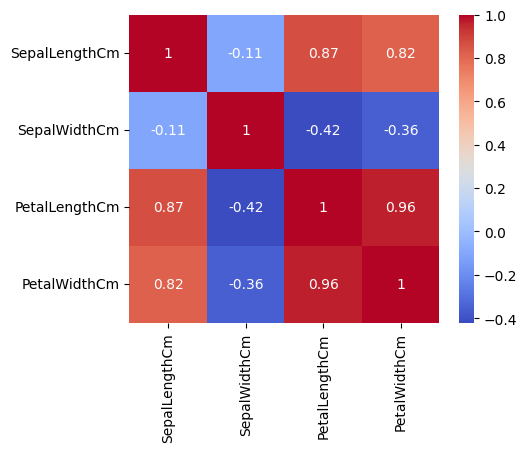

In [16]:
corr_m = numeric_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr_m , annot=True, ax=ax , cmap= 'coolwarm')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pickle

X= df.drop(columns=['Species'])
Y= df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [18]:
mode = LogisticRegression(max_iter=1000, solver='saga')
mode.fit(x_train,y_train)
print("LogisticRegression accracy: ", mode.score(x_test,y_test)*100)

LogisticRegression accracy:  97.77777777777777


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print("k-nearest neighbour accuracy: ",model.score(x_test,y_test)*100)

k-nearest neighbour accuracy:  91.11111111111111


In [20]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

print("DecisionTreeClassifier accuracy: ", dt_model.score(x_test,y_test)*100)

DecisionTreeClassifier accuracy:  86.66666666666667


In [21]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
print("svm accuracy: ",svm_model.score(x_test,y_test)*100)

svm accuracy:  93.33333333333333


In [22]:
import pickle
filename= 'irismodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [23]:
load_model= pickle.load(open(filename,'rb'))

In [24]:
load_model.predict([[2,8,6,1]])

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [25]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [26]:
df = pd.read_csv(r'C:\Users\acer\Downloads\Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [27]:
 df = df.drop(columns=['Id'])

In [28]:
# Separate features and target
X = df.drop(columns=['Species']).values
y = df['Species'].values

In [29]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0169 - loss: 2.0133    
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0017 - loss: 1.5527     
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2833 - loss: 1.2399     
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3906 - loss: 1.1015 
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4376 - loss: 1.0395 
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4047 - loss: 0.9962 
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4151 - loss: 0.9977 
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4521 - loss: 1.0013 
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4161 - loss: 0.9996     
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4970 - loss: 0.9459 
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.4193 - loss: 0.9260
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1000u

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.1758  
Test accuracy: 0.9778
